In [875]:
#https://www.cvxpy.org/
import random 
import cvxpy as cp
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [876]:
Convex_data = pd.DataFrame(pd.read_csv('Convex_Project_-_5G_Supplemental_Data.csv'))

In [877]:
M_C = len(Convex_data)

In [878]:
Convex_data.describe()

,Time (Seconds),Delay (ms),5G Network Usage (Allocated Bandwidth)
count,21.000000,21.000000,21.000000
mean,50.000000,0.400952,7.507143
std,31.024184,0.201393,4.724518
min,0.000000,0.000000,0.250000
25%,25.000000,0.280000,3.100000
50%,50.000000,0.450000,8.400000
75%,75.000000,0.570000,11.300000
max,100.000000,0.650000,14.700000


In [879]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows,
np.random.seed(0)
df_train,df_test = train_test_split(Convex_data, train_size = 0.7, test_size = 0.3, random_state = 1)
df_train.shape

(14, 3)

In [880]:
df_test.shape

(7, 3)

In [881]:
num_vars = ['Time (Seconds)', 'Delay (ms)', '5G Network Usage (Allocated Bandwidth)']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,Time (Seconds),Delay (ms),5G Network Usage (Allocated Bandwidth)
4,20,0.22,2.7
2,10,0.09,1.6
6,30,0.28,3.6
7,35,0.42,3.8
1,5,0.04,0.5


In [882]:
df_Newtest.head()

,Time (Seconds),Delay (ms),5G Network Usage (Allocated Bandwidth)
15,75,0.54,11.3
10,50,0.38,8.4
3,15,0.16,2.4
18,90,0.59,13.2
17,85,0.62,12.8


In [883]:
M_T = len(df_Newtrain)
M_V = len(df_Newtest)
K_Data_Center_P = np.ones((M_T,1))
K_Data_Center_V = np.ones((M_V,1))
K_Data_Center_V

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [884]:
Mapping_Nodes_J = np.ones((M_T,1))
Mapping_Nodes_J

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [885]:
df_Newtrain.values[:, 0]

array([ 20.,  10.,  30.,  35.,   5.,  65.,   0., 100.,  95.,  45.,  40.,
        60.,  55.,  25.])

In [886]:
Time_T = df_Newtrain.values[:, 0]
Delay_T =  df_Newtrain.values[:, 1]
Bandwidth_T =  df_Newtrain.values[:, 2]

Time_T = Time_T.reshape(M_T,1)
Delay_T = Delay_T.reshape(M_T,1)
Bandwidth_T = Bandwidth_T.reshape(M_T,1)

Power = 50
Power_T = np.random.randint(low = 0, high = 50, size=(14,))
Power_T_1 = Power_T.reshape(M_T,1)

#Mapping_Nodes_J = np.hstack((K_Data_Center,Time_T,Delay_T,Bandwidth_T,Power_T_1 ))

K_Data_Center_Predict = np.hstack((K_Data_Center_P,Time_T,Delay_T,Bandwidth_T,Power_T_1))
K_Data_Center_Predict

array([[1.00e+00, 2.00e+01, 2.20e-01, 2.70e+00, 4.40e+01],
       [1.00e+00, 1.00e+01, 9.00e-02, 1.60e+00, 4.70e+01],
       [1.00e+00, 3.00e+01, 2.80e-01, 3.60e+00, 0.00e+00],
       [1.00e+00, 3.50e+01, 4.20e-01, 3.80e+00, 3.00e+00],
       [1.00e+00, 5.00e+00, 4.00e-02, 5.00e-01, 3.00e+00],
       [1.00e+00, 6.50e+01, 5.20e-01, 9.80e+00, 3.90e+01],
       [1.00e+00, 0.00e+00, 0.00e+00, 2.50e-01, 9.00e+00],
       [1.00e+00, 1.00e+02, 6.50e-01, 1.47e+01, 1.90e+01],
       [1.00e+00, 9.50e+01, 6.20e-01, 1.36e+01, 2.10e+01],
       [1.00e+00, 4.50e+01, 4.50e-01, 8.30e+00, 3.60e+01],
       [1.00e+00, 4.00e+01, 4.10e-01, 6.10e+00, 2.30e+01],
       [1.00e+00, 6.00e+01, 4.70e-01, 9.50e+00, 6.00e+00],
       [1.00e+00, 5.50e+01, 5.10e-01, 9.10e+00, 2.40e+01],
       [1.00e+00, 2.50e+01, 3.00e-01, 3.10e+00, 2.40e+01]])

In [887]:
Power = 50
Power_V = np.random.randint(low = 0, high = 50, size=(7,))
Power_V_1 = Power_V.reshape(M_V,1)
Power_V_1

array([[12],
       [ 1],
       [38],
       [39],
       [23],
       [46],
       [24]])

In [888]:
Time_V = df_Newtest.values[:, 0]
Delay_V =  df_Newtest.values[:, 1]
Bandwidth_V =  df_Newtest.values[:, 2]

Time_V = Time_V.reshape(M_V,1)
Delay_V = Delay_V.reshape(M_V,1)
Bandwidth_V = Bandwidth_V.reshape(M_V,1)

Power = 50
Power_V = np.random.randint(low = 0, high = 50, size=(7,))
Power_V_1 = Power_V.reshape(M_V,1)

#Mapping_Nodes_J = np.hstack((K_Data_Center,Time_V,Delay_V,Bandwidth_V,Power_V_1 ))

K_Data_Center_Actual = np.hstack((K_Data_Center_V,Time_V,Delay_V,Bandwidth_V,Power_V_1))
K_Data_Center_Actual

array([[ 1.  , 75.  ,  0.54, 11.3 , 17.  ],
       [ 1.  , 50.  ,  0.38,  8.4 , 37.  ],
       [ 1.  , 15.  ,  0.16,  2.4 , 25.  ],
       [ 1.  , 90.  ,  0.59, 13.2 , 13.  ],
       [ 1.  , 85.  ,  0.62, 12.8 ,  8.  ],
       [ 1.  , 70.  ,  0.58, 10.4 ,  9.  ],
       [ 1.  , 80.  ,  0.57, 12.5 , 20.  ]])

In [889]:
b = np.random.random(size=(14,)) #exogenous load arrival rate
b

array([0.0202184 , 0.83261985, 0.77815675, 0.87001215, 0.97861834,
       0.79915856, 0.46147936, 0.78052918, 0.11827443, 0.63992102,
       0.14335329, 0.94466892, 0.52184832, 0.41466194])

In [890]:
def calculate_scalar(X, Y, theta): #Declaring values and computing the Scalar value J
#loss is calculated by taking the mean of squared differences between actual(target) and predicted values.    
    predictions = X.dot(theta)  #Dot product of array X and theta
    errors = np.subtract(predictions,Y) #Matrix subtraction with predictions and Y
    squaringErrors = np.square(errors) #Now errors contained in matrix. We square all values in matrix error.
    J = 1/(2*M_T)*np.sum(squaringErrors) #Scalar equation using matrix squErrors
    return J

In [891]:
def gradient_descent(X, Y, theta, alpha, iterations):  #Function to calculate gradient descent for linear regression
    
    result = np.zeros(iterations)   #creating a row of an array with an undetermined amount of zeroes.
    theta_interval = np.zeros([iterations, theta.size])  #creating an array for each interval to be plotted (X1, X2, X3) 
    
    for i in range(iterations):    #For loop with iterations as an input.
        predictions = X.dot(theta)   #Dot product of array X and theta resulting in scalar
        errors = np.subtract(predictions,Y) #Matrix subtration between predictions and value Y
        sum_delta = (alpha/M_T)*X.transpose().dot(errors); #learning rate over training examples * scalar of resulting dot product.  
        theta = theta-sum_delta;   #Current theta minus scalar sum_delta for final value of theta                      
        result[i] = calculate_scalar(X, Y, theta)
        theta_interval[i] = theta #Needed to show the previous thetas used for the resulting scalar.

    return theta, result, theta_interval

In [892]:
Bandwidth_T

array([[ 2.7 ],
       [ 1.6 ],
       [ 3.6 ],
       [ 3.8 ],
       [ 0.5 ],
       [ 9.8 ],
       [ 0.25],
       [14.7 ],
       [13.6 ],
       [ 8.3 ],
       [ 6.1 ],
       [ 9.5 ],
       [ 9.1 ],
       [ 3.1 ]])

In [893]:
total_cost = []
for i in range(14):
        total_cost.append(Bandwidth_T[i] + Power_T[i])
total_cost

[array([46.7]),
 array([48.6]),
 array([3.6]),
 array([6.8]),
 array([3.5]),
 array([48.8]),
 array([9.25]),
 array([33.7]),
 array([34.6]),
 array([44.3]),
 array([29.1]),
 array([15.5]),
 array([33.1]),
 array([27.1])]

In [894]:
theta_zero = np.zeros(5)
theta_zero

array([0., 0., 0., 0., 0.])

In [895]:
theta = theta_zero + total_cost
theta

array([[46.7 , 46.7 , 46.7 , 46.7 , 46.7 ],
       [48.6 , 48.6 , 48.6 , 48.6 , 48.6 ],
       [ 3.6 ,  3.6 ,  3.6 ,  3.6 ,  3.6 ],
       [ 6.8 ,  6.8 ,  6.8 ,  6.8 ,  6.8 ],
       [ 3.5 ,  3.5 ,  3.5 ,  3.5 ,  3.5 ],
       [48.8 , 48.8 , 48.8 , 48.8 , 48.8 ],
       [ 9.25,  9.25,  9.25,  9.25,  9.25],
       [33.7 , 33.7 , 33.7 , 33.7 , 33.7 ],
       [34.6 , 34.6 , 34.6 , 34.6 , 34.6 ],
       [44.3 , 44.3 , 44.3 , 44.3 , 44.3 ],
       [29.1 , 29.1 , 29.1 , 29.1 , 29.1 ],
       [15.5 , 15.5 , 15.5 , 15.5 , 15.5 ],
       [33.1 , 33.1 , 33.1 , 33.1 , 33.1 ],
       [27.1 , 27.1 , 27.1 , 27.1 , 27.1 ]])

In [896]:
K_Data_Center_Predict

array([[1.00e+00, 2.00e+01, 2.20e-01, 2.70e+00, 4.40e+01],
       [1.00e+00, 1.00e+01, 9.00e-02, 1.60e+00, 4.70e+01],
       [1.00e+00, 3.00e+01, 2.80e-01, 3.60e+00, 0.00e+00],
       [1.00e+00, 3.50e+01, 4.20e-01, 3.80e+00, 3.00e+00],
       [1.00e+00, 5.00e+00, 4.00e-02, 5.00e-01, 3.00e+00],
       [1.00e+00, 6.50e+01, 5.20e-01, 9.80e+00, 3.90e+01],
       [1.00e+00, 0.00e+00, 0.00e+00, 2.50e-01, 9.00e+00],
       [1.00e+00, 1.00e+02, 6.50e-01, 1.47e+01, 1.90e+01],
       [1.00e+00, 9.50e+01, 6.20e-01, 1.36e+01, 2.10e+01],
       [1.00e+00, 4.50e+01, 4.50e-01, 8.30e+00, 3.60e+01],
       [1.00e+00, 4.00e+01, 4.10e-01, 6.10e+00, 2.30e+01],
       [1.00e+00, 6.00e+01, 4.70e-01, 9.50e+00, 6.00e+00],
       [1.00e+00, 5.50e+01, 5.10e-01, 9.10e+00, 2.40e+01],
       [1.00e+00, 2.50e+01, 3.00e-01, 3.10e+00, 2.40e+01]])

In [897]:
#Using CVX in Python
node_direction = [1,-1]
A = random.choice(node_direction) #Connection entering or leaving node
b = np.random.random(size=(14,)) #exogenous load arrival rates

Y = np.random.random(size=(14,)) #Making load rate equal to schedule rate

# Construct the problem.
x = cp.Variable(M_T)
#objective = cp.Minimize(cp.sum(calculate_scalar(K_Data_Center_Predict, Mapping_Nodes_J, theta)))
objective = cp.Minimize(cp.sum(calculate_scalar(K_Data_Center_Predict, Y, theta_zero)))
#constraints = [0 <= x, x <= 1]
constraints = [cp.sum(A*x - b) <= 0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)

[0.50703907 0.50703907 0.50703907 0.50703907 0.50703907 0.50703907
 0.50703907 0.50703907 0.50703907 0.50703907 0.50703907 0.50703907
 0.50703907 0.50703907]
1.678265347272988e-10


In [898]:
#Making a theta array with initializations of O and setting validation parameters.
iterations = 500; #In this case time slots
alpha = 0.01;
loss = calculate_scalar(K_Data_Center_Predict, Y, theta_zero)
print('Scalar values is ', loss) #Print the scalar value for Gradient Descent

Scalar values is  0.1161480499629612


In [899]:
#Calculating gradient descent with theta and scalar J for validation set
theta, loss, theta_interval = gradient_descent(K_Data_Center_Predict, Y, theta_zero, alpha, iterations)
print('Final value of theta =', theta)
print('Y = ', loss)

Final value of theta = [nan nan nan nan nan]
Y =  [6.33977056e+001 5.48758017e+004 4.75645525e+007 4.12276348e+010
 3.57349715e+013 3.09740831e+016 2.68474769e+019 2.32706491e+022
 2.01703538e+025 1.74831038e+028 1.51538699e+031 1.31349545e+034
 1.13850146e+037 9.86821519e+039 8.55349548e+042 7.41393287e+045
 6.42619158e+048 5.57004479e+051 4.82796048e+054 4.18474237e+057
 3.62721873e+060 3.14397268e+063 2.72510840e+066 2.36204845e+069
 2.04735815e+072 1.77459331e+075 1.53816831e+078 1.33324167e+081
 1.15561693e+084 1.00165674e+087 8.68208305e+089 7.52538901e+092
 6.52279867e+095 5.65378114e+098 4.90054083e+101 4.24765300e+104
 3.68174792e+107 3.19123708e+110 2.76607587e+113 2.39755792e+116
 2.07813677e+119 1.80127137e+122 1.56129211e+125 1.35328474e+128
 1.17298971e+131 1.01671498e+134 8.81260371e+136 7.63852070e+139
 6.62085808e+142 5.73877632e+145 4.97421230e+148 4.31150939e+151
 3.73709687e+154 3.23921201e+157 2.80765921e+160 2.43360121e+163
 2.10937809e+166 1.82835048e+169 1.58476

C:\Users\micha\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-890-1df2a476ff15>:5: RuntimeWarning: overflow encountered in square
  squaringErrors = np.square(errors) #Now errors contained in matrix. We square all values in matrix error.


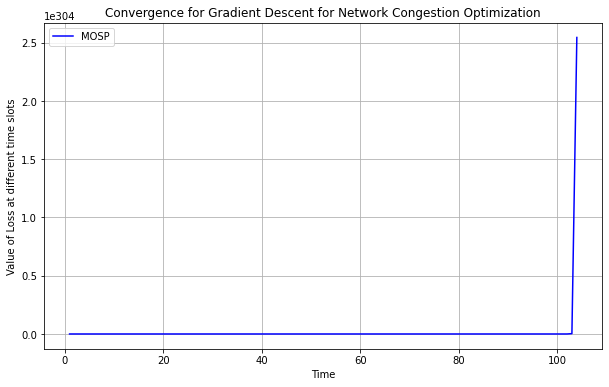

In [900]:
#Plotting the Scalar J vs. Number of Iterations for all X values combined
plt.plot(range(1, iterations + 1), loss, color = 'Blue', label = 'MOSP' )
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Value of Loss at different time slots')
plt.title('Convergence for Gradient Descent for Network Congestion Optimization')
plt.legend()
plt.show()